# Face Detection using Haar Cascades

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

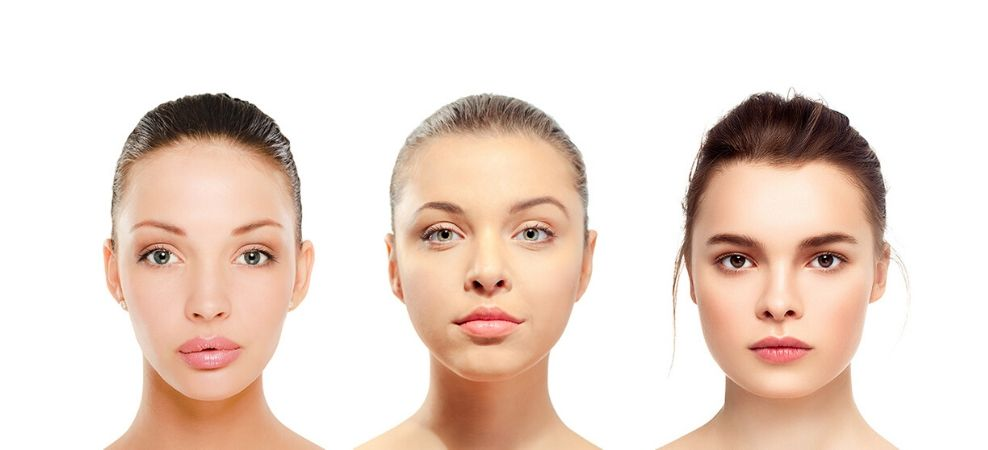

In [ ]:
faces_image = cv2.imread('/content/3-faces.jpeg')
cv2_imshow(faces_image)

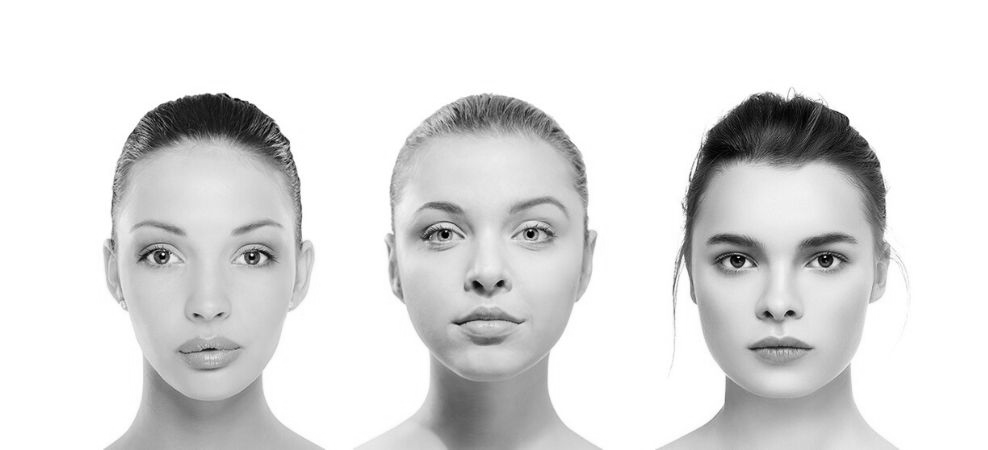

In [ ]:
gray_image = cv2.cvtColor(faces_image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

In [ ]:
face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
faces_haar_cascades = face_cascade.detectMultiScale(gray_image, 1.1,4)

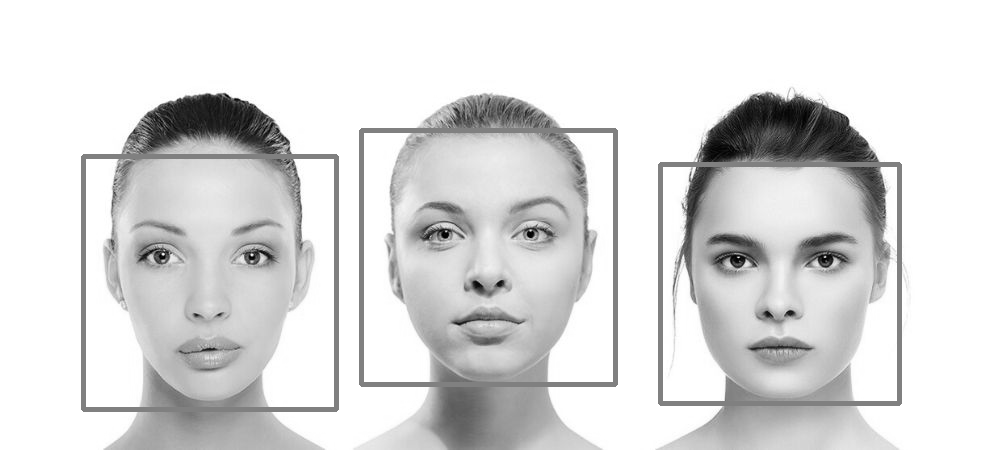

In [ ]:
for x, y, width, height in faces_haar_cascades:
  cv2.rectangle(gray_image, (x,y), (x + width, y + height), color = (128,255,128), thickness=3)

cv2_imshow(gray_image)

# Dlib HoG Face Detection

In [ ]:
import dlib
import cv2

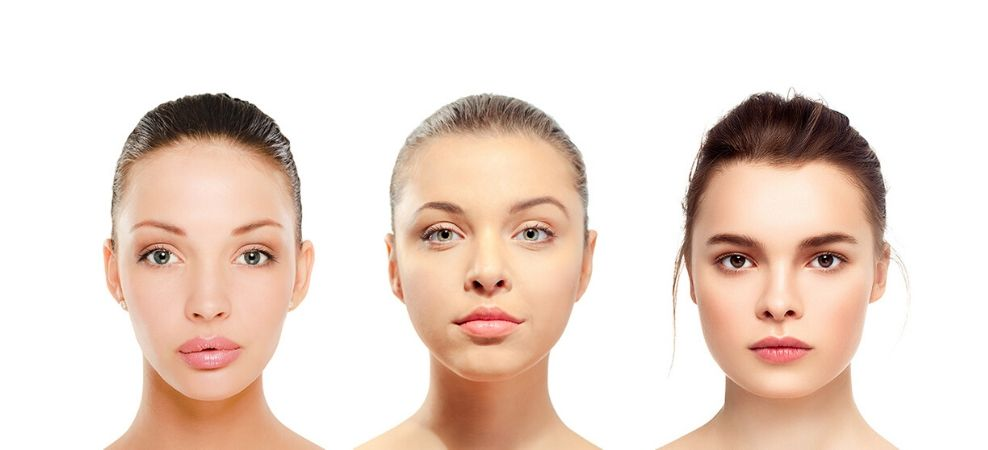

In [ ]:
faces_image = cv2.imread('/content/3-faces.jpeg')
cv2_imshow(faces_image)

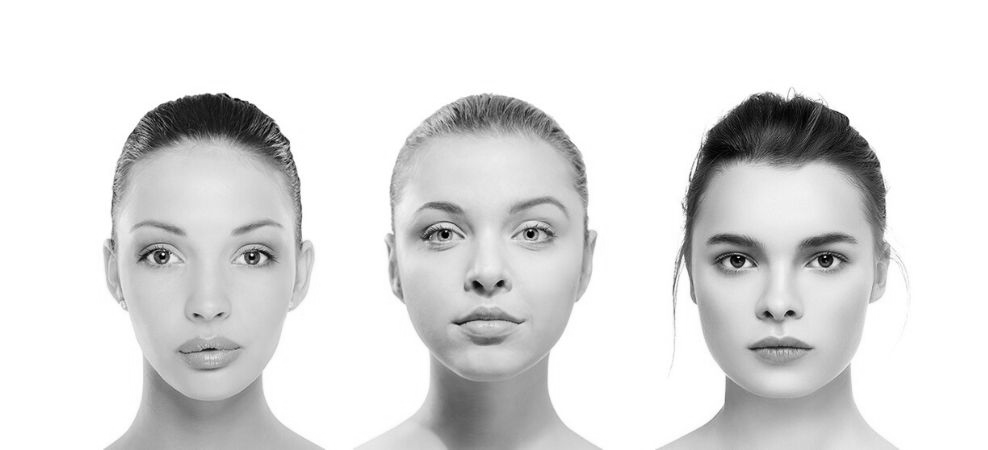

In [ ]:
gray_image = cv2.cvtColor(faces_image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

In [ ]:
hogFaceDetector = dlib.get_frontal_face_detector()
faces_dlib_hog = hogFaceDetector(gray_image, 3)

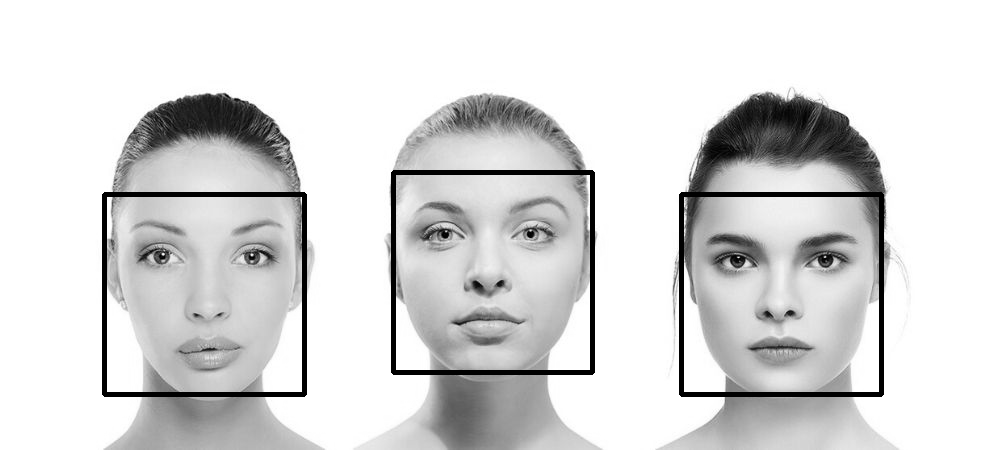

In [ ]:
for (i, rect) in enumerate(faces_dlib_hog):
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y
    #draw a rectangle
    cv2.rectangle(gray_image, (x, y), (x + w, y + h), (0, 255, 0), 3)

cv2_imshow(gray_image)

# OpenCV and Deep Neural Network

[INFO] loading model...
[INFO] computing object detections...


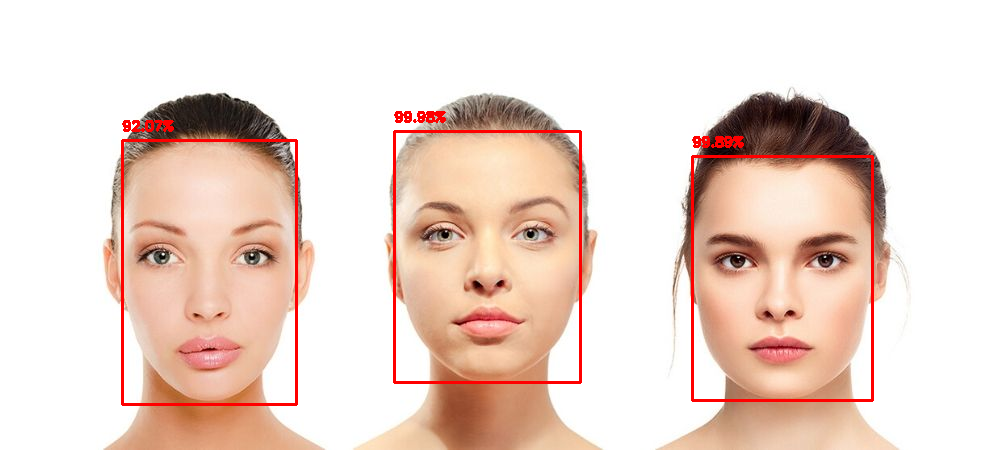

In [ ]:
import numpy as np
import argparse
import cv2

# load our serialized model from disk
print("[INFO] loading model...")
net = cv2.dnn.readNetFromCaffe("/content/deploy.prototxt.txt", "/content/res10_300x300_ssd_iter_140000.caffemodel")

# load the input image and construct an input blob for the image
# by resizing to a fixed 300x300 pixels and then normalizing it
image = cv2.imread("3-faces.jpeg")
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0,
	(300, 300), (104.0, 177.0, 123.0))

# pass the blob through the network and obtain the detections and
# predictions
print("[INFO] computing object detections...")
net.setInput(blob)
detections = net.forward()

# loop over the detections
for i in range(0, detections.shape[2]):
	# extract the confidence (i.e., probability) associated with the
	# prediction
	confidence = detections[0, 0, i, 2]

	# filter out weak detections by ensuring the `confidence` is
	# greater than the minimum confidence
	if confidence > 0.5:
		# compute the (x, y)-coordinates of the bounding box for the
		# object
		box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
		(startX, startY, endX, endY) = box.astype("int")

		# draw the bounding box of the face along with the associated
		# probability
		text = "{:.2f}%".format(confidence * 100)
		y = startY - 10 if startY - 10 > 10 else startY + 10
		cv2.rectangle(image, (startX, startY), (endX, endY),
			(0, 0, 255), 2)
		cv2.putText(image, text, (startX, y),
			cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

# show the output image
cv2_imshow(image)

# Dlib Deep Learning-based Face Detection

In [ ]:
import dlib
import cv2
import matplotlib.pyplot as plt

In [ ]:
faces_image = cv2.imread('/content/3-faces.jpeg')
gray_image = cv2.cvtColor(faces_image, cv2.COLOR_BGR2GRAY)

In [ ]:
detector = dlib.get_frontal_face_detector()
faces_dlib_detector = detector(gray_image)

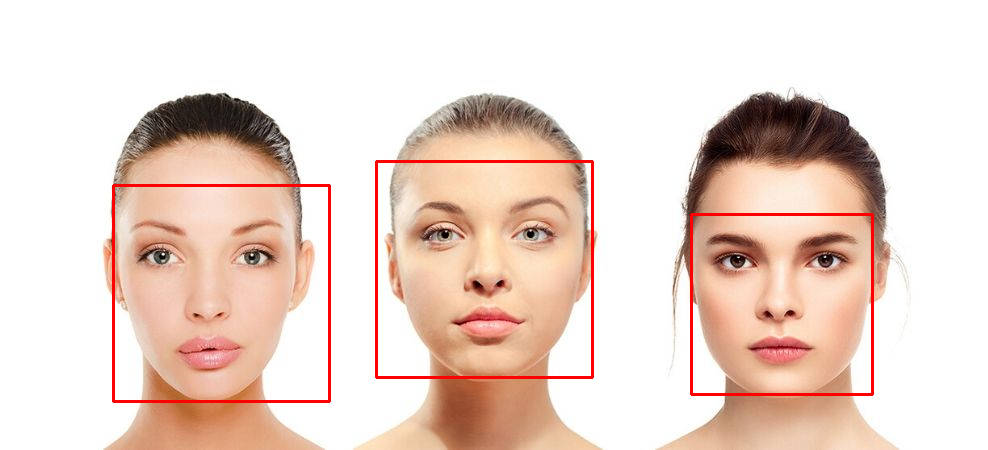

In [ ]:
for face in faces_dlib_detector:
    x, y, w, h = (face.left(), face.top(), face.width(), face.height())
    cv2.rectangle(faces_image, (x, y), (x + w, y + h), (0, 0, 255), 2)

cv2_imshow(faces_image)

# Mediapipe Deep Learning-based Face Detection

In [ ]:
!git clone https://github.com/AssemblyAI-Examples/mediapipe-python.git
!pip install mediapipe

fatal: destination path 'mediapipe-python' already exists and is not an empty directory.


In [ ]:
import cv2
import mediapipe as mp
import numpy as np

In [ ]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic
mp_pose = mp.solutions.pose
mp_face_mesh = mp.solutions.face_mesh

In [ ]:
drawing_spec = mp_drawing.DrawingSpec(thickness=2, circle_radius=1, color=[4, 244, 4])

# Create a face mesh object
with mp_face_mesh.FaceMesh(
        static_image_mode=True,
        max_num_faces=3,
        refine_landmarks=True,
        min_detection_confidence=0.75) as face_mesh:

    # Read image file with cv2 and convert from BGR to RGB
    image = cv2.imread('/content/3-faces.jpeg')
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

face_found = bool(results.multi_face_landmarks)

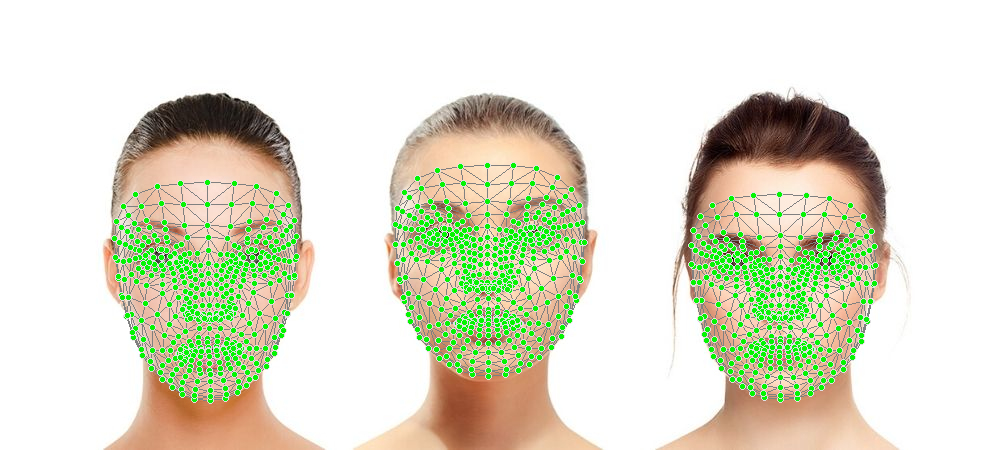

In [ ]:
if face_found:
    # Create a copy of the image

    mp_drawing.draw_landmarks(
        image=image,
        landmark_list=results.multi_face_landmarks[2],
        connections=mp_face_mesh.FACEMESH_TESSELATION,
        landmark_drawing_spec=drawing_spec,
        connection_drawing_spec=mp_drawing_styles
            .get_default_face_mesh_tesselation_style())

cv2_imshow(image)